<a href="https://colab.research.google.com/github/dsid271/GeomScale/blob/main/Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

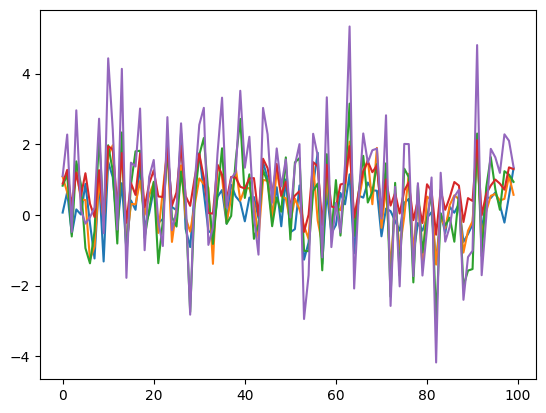

In [ ]:

import numpy as np

# Parameters
T = 100 # number of time steps
n = 5    # number of assets

# Generate a mean vector and a covariance matrix
mean = np.random.rand(n) # non-zero mean vector
cov = np.random.rand(n, n) # non-zero correlations
cov = cov @ cov.T # Ensure positive-definite covariance matrix

# Generate the multivariate Gaussian time series
X = np.random.multivariate_normal(mean, cov, T)
#Plotting the multivariate Gaussian Time Series
import matplotlib.pyplot as plt
plt.plot(X)

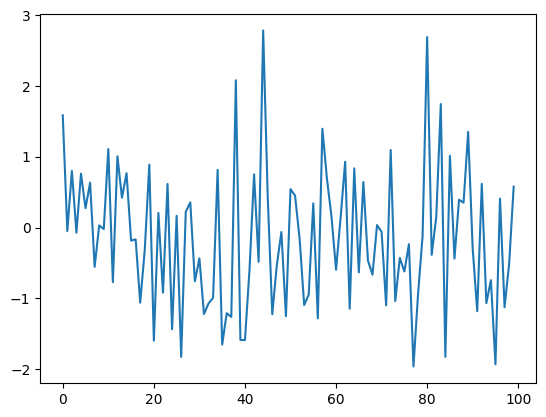

In [ ]:
# Generate a univariate Gaussian time series with a positive mean
y = np.random.normal(0, 1, T)
#Plotting the univariate Gaussian Time Series
plt.plot(y)

In [ ]:

from scipy.optimize import minimize

# Define the objective function
def objective(w):
    return np.sum((X.dot(w) - y)**2)

# Set constraints: weights are non-negative and sum to 1
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1},
               {'type': 'ineq', 'fun': lambda w: w})

# Solve the optimization problem
solution = minimize(objective, np.ones(n), method='SLSQP', constraints=constraints)

# Extract the optimal weight vector
optimal_weights = solution.x

In [ ]:
# Print the optimal weights
print("Optimal Weights:")
print(optimal_weights)

# Print the value of the objective function at the optimal solution
print("\nValue of the Objective Function at the Optimal Solution:")
print(solution.fun)

Optimal Weights:
[ 6.15246132e-01  3.84753868e-01  1.68190865e-13 -6.67781178e-13
  2.68175626e-13]

Value of the Objective Function at the Optimal Solution:
178.0747849143544
